In [100]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display

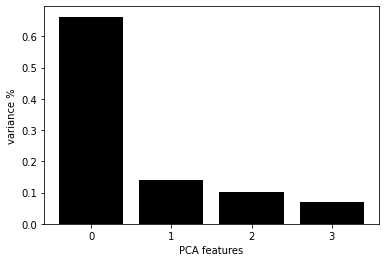

In [92]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(newdf)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

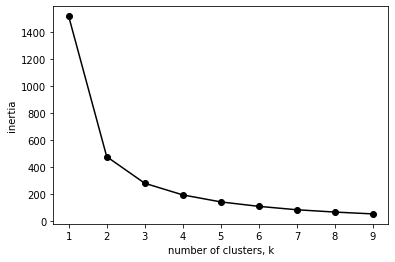

In [93]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(PCA_components.iloc[:,:2])
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [94]:
model = KMeans(n_clusters=4)
model.fit(PCA_components.iloc[:,:2])

# silhouette score
print(silhouette_score(PCA_components.iloc[:,:2], model.labels_, metric='euclidean'))

0.510832393444509


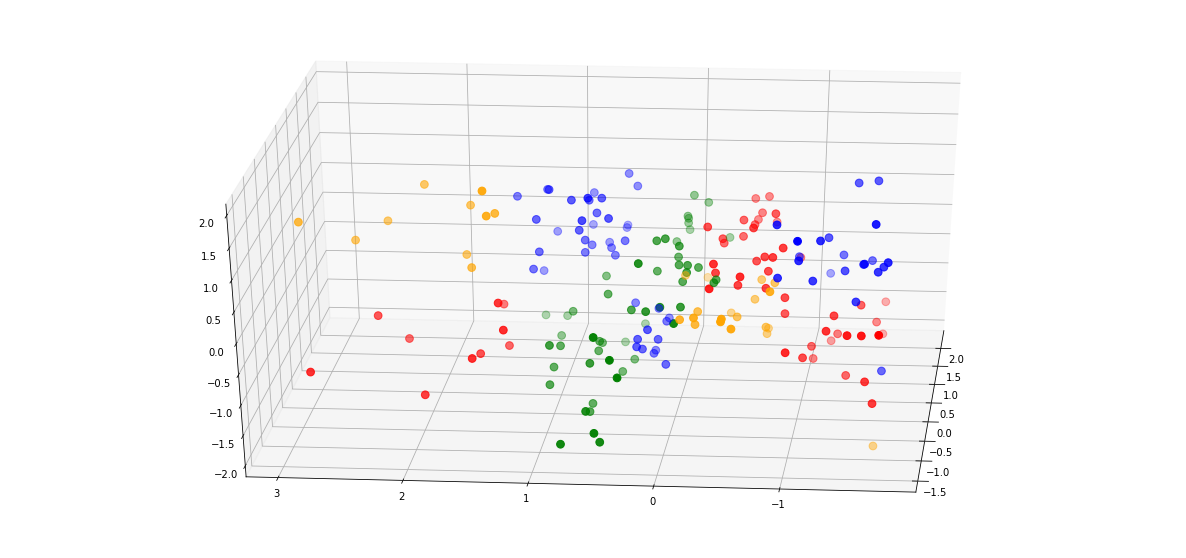

In [95]:
model = KMeans(n_clusters=4)

clusters = model.fit_predict(PCA_components.iloc[:,:2])
newdf["label"] = clusters
 
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(newdf.Age[newdf.label == 0], newdf["Annual Income (k$)"][newdf.label == 0], newdf["Spending Score (1-100)"][newdf.label == 0], c='blue', s=60)
ax.scatter(newdf.Age[newdf.label == 1], newdf["Annual Income (k$)"][newdf.label == 1], newdf["Spending Score (1-100)"][newdf.label == 1], c='red', s=60)
ax.scatter(newdf.Age[newdf.label == 2], newdf["Annual Income (k$)"][newdf.label == 2], newdf["Spending Score (1-100)"][newdf.label == 2], c='green', s=60)

ax.scatter(newdf.Age[newdf.label == 3], newdf["Annual Income (k$)"][newdf.label == 3], newdf["Spending Score (1-100)"][newdf.label == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.show()

In [97]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv')
df = df.drop(['CustomerID'],axis=1)

# map back clusters to dataframe

pred = model.predict(PCA_components.iloc[:,:2])
frame = pd.DataFrame(df)
frame['cluster'] = pred
frame.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,3
3,Female,23,16,77,0
4,Female,31,17,40,1


In [112]:
avg_df = df.groupby(['cluster'], as_index=False).mean()
display(avg_df)

,cluster,Age,Annual Income (k$),Spending Score (1-100)
0,0,28.015873,56.666667,74.396825
1,1,49.909091,51.363636,34.036364
2,2,45.905660,70.830189,31.698113
3,3,28.517241,67.689655,62.103448


[Text(0.5, 1.0, 'Age')]

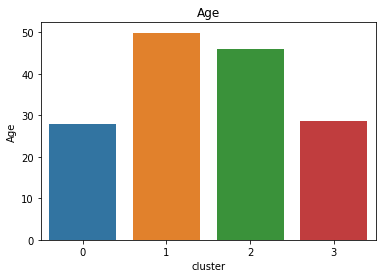

In [110]:
sns.barplot(x='cluster',y='Age',data=avg_df).set(title='Age')


[Text(0.5, 1.0, 'Spending Score (1-100)')]

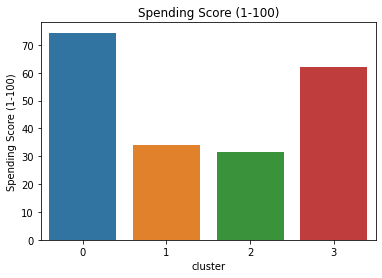

In [111]:
sns.barplot(x='cluster',y='Spending Score (1-100)',data=avg_df).set(title='Spending Score (1-100)')

[Text(0.5, 1.0, 'Annual Income (k$)')]

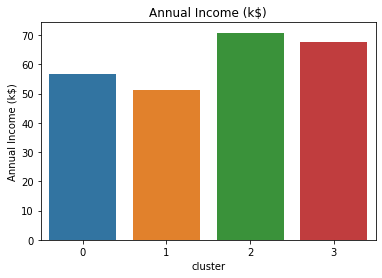

In [108]:
sns.barplot(x='cluster',y='Annual Income (k$)',data=avg_df).set(title='Annual Income (k$)')

In [113]:
df2 = pd.DataFrame(df.groupby(['cluster','Gender'])['Gender'].count())
df2.head()

Gender
cluster Gender        
0       Female      33
        Male        30
1       Female      33
        Male        22
2       Female      27